<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/Ass_Linear_regression_2_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
#df_weather['couleur']='r'
df_weather['couleur']=pd.DataFrame({'couleur':['r','b','y']})
df_weather['couleur'].fillna(0,inplace=True)
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,couleur
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,r
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,b
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,y
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,0
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,119,143,116,0,1,8.7,not good not bad,12,27,0
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,143,116,116,0,1,6.9,very bad,12,28,0
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116,116,116,0,1,8.7,very bad,12,29,0
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113,113,113,0,1,8.7,very bad,12,30,0


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [0]:
# Your code here :df = px.data.election()
fig = px.scatter_3d(df_weather,x=df_weather["MAX_TEMPERATURE_C"], y=df_weather["MIN_TEMPERATURE_C"], z=df_weather["SUNHOUR"],
                    color="SUNHOUR")
fig.show()

Is it hard to read the 3D scatterplot ?

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [0]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']
modelLR = LinearRegression().fit(X, y)
df_weather['PREDICT']=modelLR.predict(X)
df_weather['PREDICT']

0       8.980922
1      12.353602
2       7.410233
3       4.037552
4       6.421559
         ...    
360    17.296971
361    11.161599
362     9.387580
363    11.364928
364    11.364928
Name: PREDICT, Length: 365, dtype: float64

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours

Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !

In [0]:
# Your code here :
fig = px.scatter_3d(df_weather,x=df_weather["PREDICT"], y=df_weather["MIN_TEMPERATURE_C"], z=df_weather["SUNHOUR"],color="SUNHOUR")
fig.show()

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : variables must be numeric. Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots

Text(0.5, 0, 'PREDICTION TEMP MAX')

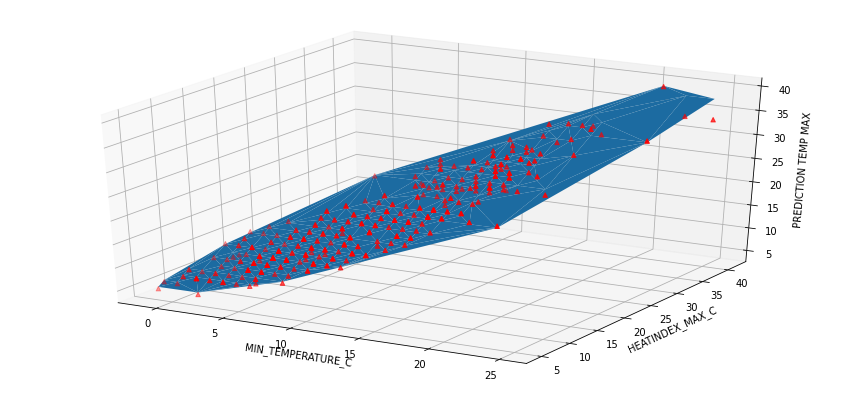

In [0]:
# Your code here :
graph=plt.figure(figsize=(15,7))
ax=graph.add_subplot(111, projection='3d')

X=df_weather[['MIN_TEMPERATURE_C','HEATINDEX_MAX_C']] # NB le maximum de variable est 2 
y=df_weather['MAX_TEMPERATURE_C']
modelLR=LinearRegression().fit(X, y)
df_weather['PREDICT2']=modelLR.predict(X)
ax.scatter3D(df_weather['MIN_TEMPERATURE_C'],df_weather['HEATINDEX_MAX_C'],df_weather['MAX_TEMPERATURE_C'],c='r',marker='^')
ax.plot_trisurf(df_weather['MIN_TEMPERATURE_C'],df_weather['HEATINDEX_MAX_C'],df_weather['PREDICT2'])
ax.set_xlabel('MIN_TEMPERATURE_C')
ax.set_ylabel('HEATINDEX_MAX_C')
ax.set_zlabel('PREDICTION TEMP MAX')